In [1]:
import pandas as pd

In [2]:
df=pd.read_csv("C:/Users/namra/OneDrive/Desktop/Mscit project new/online_shoppers_intention.csv")
df.head()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
0,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,Feb,1,1,1,1,Returning_Visitor,False,False
1,0,0.0,0,0.0,2,64.000000,0.00,0.10,0.0,0.0,Feb,2,2,1,2,Returning_Visitor,False,False
2,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,Feb,4,1,9,3,Returning_Visitor,False,False
3,0,0.0,0,0.0,2,2.666667,0.05,0.14,0.0,0.0,Feb,3,2,2,4,Returning_Visitor,False,False
4,0,0.0,0,0.0,10,627.500000,0.02,0.05,0.0,0.0,Feb,3,3,1,4,Returning_Visitor,True,False


In [3]:
df.isnull().sum()

Administrative             0
Administrative_Duration    0
Informational              0
Informational_Duration     0
ProductRelated             0
ProductRelated_Duration    0
BounceRates                0
ExitRates                  0
PageValues                 0
SpecialDay                 0
Month                      0
OperatingSystems           0
Browser                    0
Region                     0
TrafficType                0
VisitorType                0
Weekend                    0
Revenue                    0
dtype: int64

In [4]:
from sklearn import preprocessing
le=preprocessing.LabelEncoder()
le.fit(df["Month"])
le.classes_

df["Month"]=le.transform(df["Month"])

In [5]:
from sklearn import preprocessing
le=preprocessing.LabelEncoder()
le.fit(df["VisitorType"])
le.classes_
df["VisitorType"]=le.transform(df["VisitorType"])

In [6]:
from sklearn import preprocessing
le=preprocessing.LabelEncoder()
le.fit(df["Weekend"])
le.classes_
df["Weekend"]=le.transform(df["Weekend"])

In [7]:
from sklearn import preprocessing
le=preprocessing.LabelEncoder()
le.fit(df["Revenue"])
le.classes_
df["Revenue"]=le.transform(df["Revenue"])

In [8]:
df.head()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
0,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,2,1,1,1,1,2,0,0
1,0,0.0,0,0.0,2,64.000000,0.00,0.10,0.0,0.0,2,2,2,1,2,2,0,0
2,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,2,4,1,9,3,2,0,0
3,0,0.0,0,0.0,2,2.666667,0.05,0.14,0.0,0.0,2,3,2,2,4,2,0,0
4,0,0.0,0,0.0,10,627.500000,0.02,0.05,0.0,0.0,2,3,3,1,4,2,1,0


In [9]:
import matplotlib.pyplot as plt
import seaborn as sns

<AxesSubplot:>

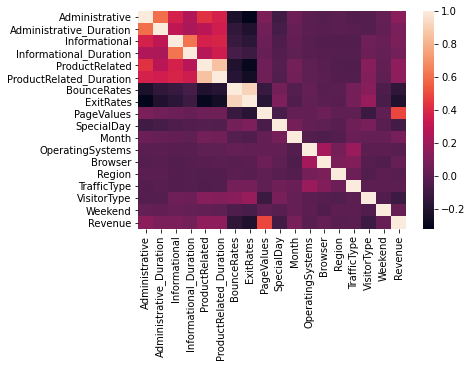

In [10]:
sns.heatmap(df.corr())

C:\Users\namra\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Revenue', ylabel='Density'>

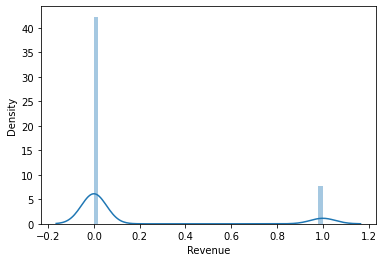

In [11]:
sns.distplot(df['Revenue'])

In [12]:
y=df[["Revenue"]]
x=df[["Administrative","Administrative_Duration","Informational","Informational_Duration","ProductRelated","ProductRelated_Duration","BounceRates","ExitRates","PageValues","SpecialDay","Month","OperatingSystems","Browser","Region","TrafficType","VisitorType","Weekend"]]
x=df.drop("Revenue",axis=1)

In [13]:
df.shape

(12330, 18)

In [14]:
y.shape

(12330, 1)

In [15]:
x.shape

(12330, 17)

In [16]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=101)

In [17]:
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()  
x_train = sc.fit_transform(x_train)  
x_test = sc.transform(x_test)

In [18]:
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier(n_estimators=200, random_state=100)  
clf.fit(x_train, y_train)  
y_pred =clf.predict(x_test)

<ipython-input-18-970c16846dda>:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  clf.fit(x_train, y_train)


In [19]:
from sklearn import metrics  
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.9059205190592052


In [20]:
ad=clf.feature_importances_
ad

array([0.04159947, 0.05915653, 0.01685274, 0.02629856, 0.07326962,
       0.09023345, 0.0548286 , 0.09247394, 0.37721614, 0.00340357,
       0.0438111 , 0.01763657, 0.01862871, 0.0301985 , 0.03175222,
       0.01259976, 0.01004053])

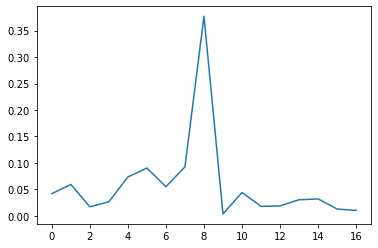

In [21]:
plt.plot(ad)

In [22]:
x.columns

Index(['Administrative', 'Administrative_Duration', 'Informational',
       'Informational_Duration', 'ProductRelated', 'ProductRelated_Duration',
       'BounceRates', 'ExitRates', 'PageValues', 'SpecialDay', 'Month',
       'OperatingSystems', 'Browser', 'Region', 'TrafficType', 'VisitorType',
       'Weekend'],
      dtype='object')

In [23]:
impdf=pd.DataFrame(ad,index=x.columns)
impdf

,0
Administrative,0.041599
Administrative_Duration,0.059157
Informational,0.016853
Informational_Duration,0.026299
ProductRelated,0.073270
ProductRelated_Duration,0.090233
BounceRates,0.054829
ExitRates,0.092474
PageValues,0.377216
SpecialDay,0.003404


No handles with labels found to put in legend.


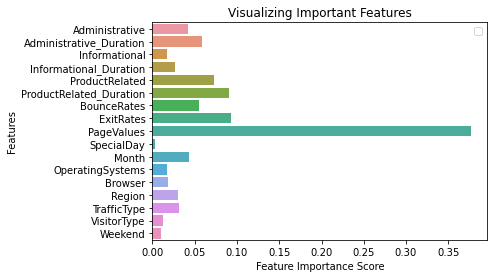

In [24]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
# Creating a bar plot
sns.barplot(x=clf.feature_importances_,y=x.columns)
# Add labels to your graph
plt.xlabel('Feature Importance Score')
plt.ylabel('Features')
plt.title("Visualizing Important Features")
plt.legend()
plt.show()

In [25]:
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(y_test, y_pred)
cm

array([[2005,   86],
       [ 146,  229]], dtype=int64)

<AxesSubplot:>

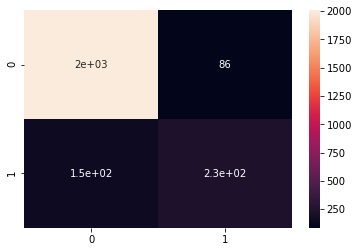

In [26]:
sns.heatmap(cm,annot=True)

In [27]:
from sklearn.model_selection import KFold
kf = KFold(n_splits=2)
kf.get_n_splits(x)
print(kf)
KFold(n_splits=2, random_state=None, shuffle=False)
for train_index, test_index in kf.split(x):
    print("TRAIN:", train_index, "TEST:", test_index)

KFold(n_splits=2, random_state=None, shuffle=False)
TRAIN: [ 6165  6166  6167 ... 12327 12328 12329] TEST: [   0    1    2 ... 6162 6163 6164]
TRAIN: [   0    1    2 ... 6162 6163 6164] TEST: [ 6165  6166  6167 ... 12327 12328 12329]


In [28]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(clf,x_train,y_train, scoring='accuracy', cv=10)
print(scores)
print (scores.mean())

C:\Users\namra\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\namra\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\namra\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\namra\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y wa

[0.90881459 0.89564336 0.90172239 0.91084093 0.89452333 0.89756592
 0.90669371 0.91176471 0.89148073 0.90669371]
0.9025743386129212
